# Homework 2: Due 25 June 2022, 11:59 PM

Q1) Regarding our Logistic Regression model on Iris dataset. 

a) Which target class was misclassified the most? What was it mostly classified as?

b) Write a function which creates a 3 by 3 table such that:
  - row $i$ column $j$ shows the number of elements of type $i$ that were classified as type $j$.
  - note the diagonal is the count of correctly classified elements.
  - this matrix is known as 'confusion matrix' 



In [1]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import seaborn as sns

In [2]:
data = datasets.load_iris()

In [3]:
print(data.data.shape)

(150, 4)


In [4]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [5]:
iris_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


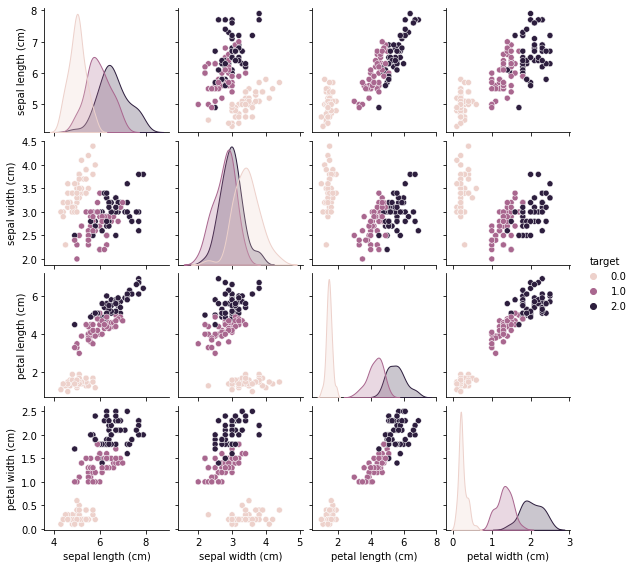

In [7]:
sns.pairplot(iris_df,hue="target",height=2)
# Setosa-0
# versicolor-1
# virginica-2

From the pairplot we can say that the class 2 (virginica) is misclassified the most and it must be classified as class 1 (versicolor) instead of class 2 (virginica).Because, from the plots the class 0(setosa) datapoints are located distinct from the other two classes so the possibility of misclassification lies between class 1 and class 2 i.e virginica and versicolor. Also from the below classification report we can come to conclusion that virginica is misclassified as versicolor.

In [8]:
from sklearn.model_selection import train_test_split
x=iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=iris_df['target']
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

(150, 4)
(150,)


In [9]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [10]:
y_pred = lr.predict(x_test)
print(y_pred)

[2. 0. 0. 2. 2. 1. 1. 0. 0. 2. 0. 2. 0. 1. 2. 2. 0. 1. 1. 0. 1. 1. 0. 2.
 2. 2. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 2. 2. 2. 2. 2. 1. 0. 1. 1. 2.
 0. 0.]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      0.94      0.97        17
         2.0       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Confusion matrix
Here the row i * column j shows the number of elements of type i that were classified as type j and
The diagonal represents the count of correctly classified elements.

In [12]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_pred)
matrix

array([[18,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 15]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.98


In [14]:
lr.score(x_test, y_test)

0.98

Q2) Try creating new features to the Iris Dataset by multiplying/squaring various current features together. (e.g. area = length*width)

Can we increase the performance on the test set? I believe we can. Please come up with a better performing set of features. Compare the performance with lr.score.

Important: Keep test size 33% of the original data, which corresponds to 50 samples.

In [15]:
iris_df['sepal length (cm) * petal width (cm)'] = iris_df['sepal length (cm)'] * iris_df['petal width (cm)']
iris_df['petal length (cm) * petal width (cm)'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']
iris_df['sepal width (cm) * sepal width (cm)'] = iris_df['sepal width (cm)'] * iris_df['sepal width (cm)']
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
14                 5.8               4.0                1.2               0.2   
98                 5.1               2.5                3.0               1.1   
75                 6.6               3.0                4.4               1.4   
16                 5.4               3.9                1.3               0.4   
131                7.9               3.8                6.4               2.0   
..                 ...               ...                ...               ...   
133                6.3               2.8                5.1               1.5   
137                6.4               3.1                5.5               1.8   
72                 6.3               2.5                4.9               1.5   
140                6.7               3.1                5.6               2.4   
37                 4.9               3.6                1.4               0.1   

     target  sepal length (

In [16]:
x=iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal length (cm) * petal width (cm)','petal length (cm) * petal width (cm)','sepal width (cm) * sepal width (cm)']]
y=iris_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [17]:
lr = LogisticRegression(penalty='l2', C=10, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=500)

In [18]:
lr.score(x_test, y_test)

1.0

As we got 0.98 performance score for the actual features of test data, we can definitely increase its performance by adding new features. So I have tried combining different features together and obtained new data set by adding 'sepal length (cm) * petal width (cm)', 'petal length (cm) * petal width (cm)', 'sepal width (cm) * sepal width (cm)' as new features which increased the performance of the test set.

The performance on the test set increased to by 0.2 when copared to the lr.score of actual dataset features. So the performance of the new test data reached 1.0